# Dataset Statistics

## INFO!
Die Klasse "unclassified" bedeuted, dass diesen Fragmenten manuell noch keine Klasse zugeordnet wurde. Aktuell fallen darunter alle Aufnahmen der Uni Münster, außer "3_m-h-h" bzw. "mu-3".


In [1]:
from datetime import datetime
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pd.set_option("display.precision", 2)

## Load statistics

In [2]:
FIGURE_OUTPUT_DIR = Path("output/figures/statistics")
FIGURE_OUTPUT_DIR.mkdir(exist_ok=True)

# To generate a new stats file run the script save_trajectory_proj_and_stats.py!
STATS_BASE_DIR = Path("output/statistics/hist/")

# contains segmented mu trajectories; Will be counted as class "unclassified"
separated_mu = pd.read_csv(STATS_BASE_DIR / "tf100ms_2_separated_mu" / "all_fragments.csv")

# contains classified trajectories
# ds4: tf100ms_2024-08-31_20-56-44 ?
# ds6: tf100ms_2024-08-31_21-01-56
classified_df = pd.read_csv(STATS_BASE_DIR / "tf100ms_ds5" / "all_fragments.csv")

print(separated_mu.columns)
print(classified_df.columns)

display(classified_df)

Index(['scene', 'instance_id', 'fragment_id', 'class', 'traj_evnt_count',
       'traj_len_s', 'frag_evnt_count', 'frag_len_s'],
      dtype='object')
Index(['scene', 'instance_id', 'fragment_id', 'class', 'traj_evnt_count',
       'traj_len_s', 'frag_evnt_count', 'frag_len_s', 'frag_std'],
      dtype='object')


,scene,instance_id,fragment_id,class,traj_evnt_count,traj_len_s,frag_evnt_count,frag_len_s,frag_std
0,hn-bee-1,0,0,bee,22690,3.58,808,0.1,1.83
1,hn-bee-1,0,1,bee,22690,3.58,629,0.1,1.39
2,hn-bee-1,0,2,bee,22690,3.58,724,0.1,1.85
3,hn-bee-1,0,3,bee,22690,3.58,761,0.1,1.66
4,hn-bee-1,0,4,bee,22690,3.58,847,0.1,2.27
...,...,...,...,...,...,...,...,...,...
9020,mu-3,9,260,bee,686813,26.41,409,0.1,2.93
9021,mu-3,9,261,bee,686813,26.41,597,0.1,3.58
9022,mu-3,9,262,bee,686813,26.41,505,0.1,2.70
9023,mu-3,9,263,bee,686813,26.41,2907,0.1,3.16


In [3]:
# clear class names for datasets not yet classified
separated_mu["class"] = "unclassified"
display(separated_mu.head())

,scene,instance_id,fragment_id,class,traj_evnt_count,traj_len_s,frag_evnt_count,frag_len_s
0,mu-1,0,0,unclassified,1015970,40.43,43,0.1
1,mu-1,0,1,unclassified,1015970,40.43,14,0.1
2,mu-1,0,2,unclassified,1015970,40.43,290,0.1
3,mu-1,0,3,unclassified,1015970,40.43,630,0.1
4,mu-1,0,4,unclassified,1015970,40.43,450,0.1


In [4]:
# Combine dataframes
classified_scenes = classified_df["scene"].unique()
unclassified_df = separated_mu[~separated_mu["scene"].isin(classified_scenes)]
df = pd.concat([classified_df, unclassified_df])

print("total number of fragments:", len(df.index))
print("total number of classified fragments:", len(classified_df.index))
print("unclassified mu scenes:", unclassified_df["scene"].unique())
print("mu total fragments:", len(separated_mu.index), ", mu unclassified fragments:", len(unclassified_df.index))

# combine all
# df = pd.concat([combined_mu, classified_pf])
# display(df["scene"].unique())
# print("Total fragment count:", len(df))

total number of fragments: 12333
total number of classified fragments: 9025
unclassified mu scenes: ['mu-1' 'mu-2' 'mu-4' 'mu-5' 'mu-6']
mu total fragments: 6383 , mu unclassified fragments: 3308


## Trajectory stats

### Grouped by Trajectory Stats

In [5]:
agg = {
    "class": "first",
    "fragment_id": "count",
    "traj_evnt_count": "first",
    "traj_len_s": "first",
    "frag_evnt_count": "mean",
    "frag_len_s": "mean",
    "frag_std": "mean",
}

traj_df = df.groupby(["scene","instance_id"]).agg(agg)
traj_df.rename(columns={
    "fragment_id":"frag_count", 
    "frag_std":"mean_frag_std",
    "frag_evnt_count":"mean_frag_evnt_count"}, inplace=True)

display(traj_df)

class  frag_count  traj_evnt_count  traj_len_s  \
scene    instance_id                                                          
hn-bee-1 0                     bee          36            22690        3.58   
         1                     bee          72             8604        7.11   
         2                     bee          31            11172        3.01   
         3                     bee          15            38695        1.46   
         4                     bee          30            24285        2.95   
...                            ...         ...              ...         ...   
mu-6     95           unclassified           1               30        0.02   
         96           unclassified          22            67462        2.18   
         97           unclassified           2              115        0.12   
         98           unclassified           5              304        0.43   
         99           unclassified           4              466        0.39   

                      mean_frag_evnt_count  frag_len_s  mean_frag_std  
scene    instance_id                                                   
hn-bee-1 0                          630.28         0.1           1.49  
         1                          119.50         0.1           0.23  
         2                          360.39         0.1           0.69  
         3                         2579.67         0.1           2.40  
         4                          809.50         0.1           1.82  
...                                    ...         ...            ...  
mu-6     95                          30.00         0.1            NaN  
         96                        3066.45         0.1            NaN  
         97                          57.50         0.1            NaN  
         98                          60.80         0.1            NaN  
         99                         116.50         0.1            NaN  

[551 rows x 7 columns]

### Trajectory Stats grouped by Class

,traj_count,mean_traj_evnt_count,sum_traj_evnt_count,mean_traj_len_s,sum_traj_len_s,mean_frag_count,sum_frag_count
class,,,,,,,
bee,66,35268.95,2327751,5.53,364.97,55.86,3687
bumblebee,47,72270.32,3396705,1.14,53.62,11.94,561
butterfly,21,109321.71,2295756,5.01,105.17,50.57,1062
dragonfly,112,52047.11,5829276,1.88,210.17,19.29,2160
insect,70,25259.97,1768198,0.70,48.79,7.53,527
unclassified,152,110308.84,16766944,2.12,322.45,21.76,3308
wasp,83,12602.16,1045979,1.19,98.76,12.39,1028


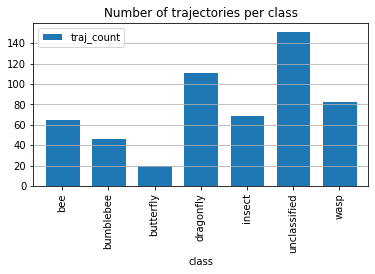

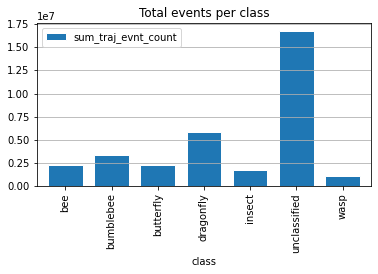

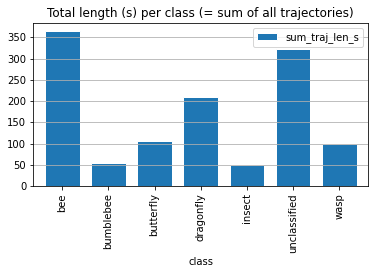

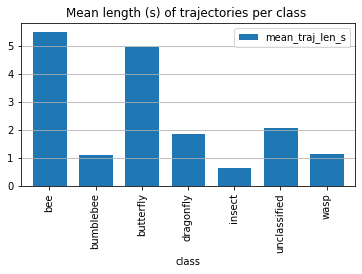

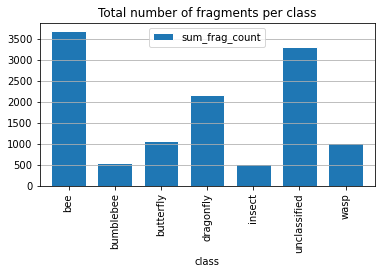

In [6]:
# aggregieren von frag-columns macht hier keinen sinn, weil die frag-column bereits pro traj aggregiert sind!
# dh man würde zb mean vom mean nehmen!
agg = {
    "class": "count",
    "traj_evnt_count": ["mean","sum"],
    "traj_len_s": ["mean","sum"],
    "frag_count": ["mean","sum"],
}

traj_class_df = traj_df.groupby("class").agg(agg)
# rename multi-index columns (make 2 headers to 1 header)
traj_class_df.columns = [f'{j}_{i}' for i, j in traj_class_df.columns]
traj_class_df.rename(columns={"count_class":"traj_count"}, inplace=True)
display(traj_class_df)


# for c in traj_class_df.columns:
#     print(c, traj_class_df[c].values[0].dtype)
#     for x in traj_class_df[c].values:
#         if isinstance(x, np.int64):
#             print(x)
#         else:
#             print(f"{x:.2f}")
#     print()   

# datetime_str = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
# traj_class_df.to_csv(f"output/from_notebooks/dataset_traj_stats_{datetime_str}.csv", index=True, header=True)

# Transpose to color bars differently; Not so pretty bc y labels are missing
# traj_class_df_t = traj_class_df.T
# display(traj_class_df_t)
# traj_class_df_t1 = traj_class_df_t.loc[["traj_count"], :]
# display(traj_class_df_t1)
# ax = traj_class_df_t1.plot(kind='bar', label='index', colormap='Paired')


plot_vals = {
    "traj_count":"Number of trajectories per class",
    "sum_traj_evnt_count":"Total events per class",
    "sum_traj_len_s":"Total length (s) per class (= sum of all trajectories)",
    "mean_traj_len_s":"Mean length (s) of trajectories per class ",
    "sum_frag_count":"Total number of fragments per class",
}

for col,caption in plot_vals.items():
    ax = traj_class_df.plot(y=[col], \
                                kind="bar", edgecolor='white', width=0.75, \
                                title=caption)
    ax.grid(axis="y")
    ax.figure.set_size_inches(6,3)


In [7]:
def print_columns_for_latex(df, name_first=True):
    for c in df.columns:
        print(c)
        for k,x in df[c].items():
            if isinstance(x, int):
                s = str(int(x))
            else:
                s = f"{x:.2f}"
            v1,v2 = (k,s) if name_first else (s,k)
            print("("+v1+","+v2+")", end=" ")
        print()
        print()

In [8]:
# Print for latex plot

reorder_list = ["bee","bumblebee","wasp","butterfly","dragonfly","insect"]
print(",".join(reorder_list))
reorder_list.reverse()
print(",".join(reorder_list))
print()

traj_class_df1 = traj_class_df[traj_class_df.index != "unclassified"].reindex(reorder_list)

print_columns_for_latex(traj_class_df1, name_first=False)

# for c in traj_class_df1.columns:
#     print(c, traj_class_df1[c].values[0].dtype, type(traj_class_df1[c].values[0]))
#     for k,x in traj_class_df1[c].items():
#         if isinstance(x, int):
#             s = str(int(x))
#         else:
#             s = f"{x:.2f}"
#         print("("+s+","+k+")", end=" ")
#     print()
#     print()

bee,bumblebee,wasp,butterfly,dragonfly,insect
insect,dragonfly,butterfly,wasp,bumblebee,bee

traj_count
(70,insect) (112,dragonfly) (21,butterfly) (83,wasp) (47,bumblebee) (66,bee) 

mean_traj_evnt_count
(25259.97,insect) (52047.11,dragonfly) (109321.71,butterfly) (12602.16,wasp) (72270.32,bumblebee) (35268.95,bee) 

sum_traj_evnt_count
(1768198,insect) (5829276,dragonfly) (2295756,butterfly) (1045979,wasp) (3396705,bumblebee) (2327751,bee) 

mean_traj_len_s
(0.70,insect) (1.88,dragonfly) (5.01,butterfly) (1.19,wasp) (1.14,bumblebee) (5.53,bee) 

sum_traj_len_s
(48.79,insect) (210.17,dragonfly) (105.17,butterfly) (98.76,wasp) (53.62,bumblebee) (364.97,bee) 

mean_frag_count
(7.53,insect) (19.29,dragonfly) (50.57,butterfly) (12.39,wasp) (11.94,bumblebee) (55.86,bee) 

sum_frag_count
(527,insect) (2160,dragonfly) (1062,butterfly) (1028,wasp) (561,bumblebee) (3687,bee) 



## Trajectory stats

### Trajectory stats for all classes combined (excluding unclassified)

In [9]:

agg = {
    "class": "count",
    "traj_evnt_count": ["mean","sum"],
    "traj_len_s": ["mean","sum"],
    "frag_count": ["mean","sum"],
}

traj_comb_df = traj_df[traj_df["class"]!="unclassified"].agg(agg)
# rename multi-index columns (make 2 headers to 1 header)
# traj_comb_df.columns = [f'{j}_{i}_{k}' for i,j,k in traj_comb_df.columns]
# traj_class_df.rename(columns={"count_class":"traj_count"}, inplace=True)

print("Trajectory stats for all classes combined (excluding unclassified)")
with pd.option_context('display.float_format', '{:0.2f}'.format):
    display(traj_comb_df)


Trajectory stats for all classes combined (excluding unclassified)


,class,traj_evnt_count,traj_len_s,frag_count
count,399.00,NaN,NaN,NaN
mean,NaN,41763.57,2.21,22.62
sum,NaN,16663665.00,881.50,9025.00


In [10]:
print(traj_class_df.to_latex(index=False,
                  formatters={"name": str.upper},
                  float_format="{:.1f}".format,
))  


\begin{tabular}{rrrrrrr}
\toprule
 traj\_count &  mean\_traj\_evnt\_count &  sum\_traj\_evnt\_count &  mean\_traj\_len\_s &  sum\_traj\_len\_s &  mean\_frag\_count &  sum\_frag\_count \\
         66 &               35269.0 &              2327751 &              5.5 &           365.0 &             55.9 &            3687 \\
\midrule
         47 &               72270.3 &              3396705 &              1.1 &            53.6 &             11.9 &             561 \\
         21 &              109321.7 &              2295756 &              5.0 &           105.2 &             50.6 &            1062 \\
        112 &               52047.1 &              5829276 &              1.9 &           210.2 &             19.3 &            2160 \\
         70 &               25260.0 &              1768198 &              0.7 &            48.8 &              7.5 &             527 \\
        152 &              110308.8 &             16766944 &              2.1 &           322.5 &             21.8 &        

C:\Users\Marc\AppData\Local\Temp\ipykernel_7816\2507859522.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(traj_class_df.to_latex(index=False,


## Fragment Stats

### Event count / Fragment count histogram

(0,5775) (1024,1254) (2048,645) (3072,410) (4096,238) (5120,167) (6144,102) (7168,77) (8192,85) (9216,38) 

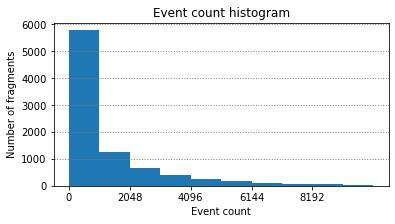

In [11]:
frag_hist_df = classified_df["frag_evnt_count"]

bins = list(range(0, 1024*10+1, 1024))

counts, bin_edges = np.histogram(frag_hist_df, bins=bins)

for x,y in list(zip(bin_edges[:-1], counts)):
    print(f"({x},{y})", end=" ")

plt.figure(figsize=(6,3))
plt.hist(frag_hist_df, bins=bins)
plt.title("Event count histogram")
plt.xlabel("Event count")
plt.xticks(np.arange(0, 1024*10, 1024*2))
plt.ylabel("Number of fragments")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.savefig(FIGURE_OUTPUT_DIR/"Event count histogram 2.png", format="png", bbox_inches="tight", dpi=200)
plt.show()

### Number of Fragments with min. event count

In [12]:

print("All", len(classified_df.index))
print(">=2048", (classified_df["frag_evnt_count"] >= 2048).sum())
print(">=4096", (classified_df["frag_evnt_count"] >= 4096).sum())


All 9025
>=2048 1996
>=4096 941


### Number of Fragments per class grouped by event count


,all,below_2048,over_2048,2048_to_4096,over_4096
class,,,,,
bee,3687,3368,319,194,125
bumblebee,561,214,347,110,237
butterfly,1062,844,218,134,84
dragonfly,2160,1261,899,493,406
insect,527,417,110,54,56
unclassified,3308,2711,597,123,474
wasp,1028,925,103,70,33


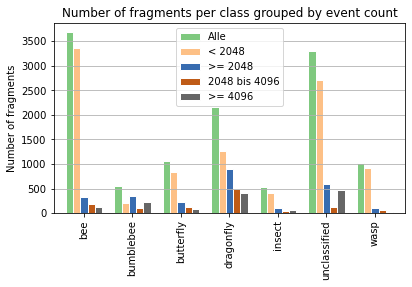

In [13]:
df_frags_per_class = pd.DataFrame()
df_frags_per_class["all"] = df.groupby("class").size()
df_frags_per_class["below_2048"] = df[df["frag_evnt_count"] < 2048].groupby("class").size()
df_frags_per_class["over_2048"] = df[df["frag_evnt_count"] >= 2048].groupby("class").size()
df_frags_per_class["2048_to_4096"] = df[(df["frag_evnt_count"] >= 2048) & (df["frag_evnt_count"] < 4096)].groupby("class").size()
df_frags_per_class["over_4096"] = df[df["frag_evnt_count"] >= 4096].groupby("class").size()

ax = df_frags_per_class.plot(y=["all", "below_2048", "over_2048", "2048_to_4096", "over_4096"], \
                            kind="bar", colormap="Accent", edgecolor='white', width=0.75, \
                            ylabel="Number of fragments", xlabel="",
                            title="Number of fragments per class grouped by event count")
ax.grid(axis="y")
ax.legend(["Alle", "< 2048", ">= 2048", "2048 bis 4096", ">= 4096"])
ax.figure.set_size_inches(6.3,3.5)

display(df_frags_per_class)


In [14]:
# save for latex

# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'font.size' : 11,
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })

fig = ax.get_figure()
fig.tight_layout()
# fig.set_size_inches(6.3,5)
fig.savefig('output/from_notebooks/Number of fragments per class grouped by event count.png')
fig.savefig('output/from_notebooks/Number of fragments per class grouped by event count.pgf')

In [15]:
print_columns_for_latex(df_frags_per_class, name_first=True)

all
(bee,3687) (bumblebee,561) (butterfly,1062) (dragonfly,2160) (insect,527) (unclassified,3308) (wasp,1028) 

below_2048
(bee,3368) (bumblebee,214) (butterfly,844) (dragonfly,1261) (insect,417) (unclassified,2711) (wasp,925) 

over_2048
(bee,319) (bumblebee,347) (butterfly,218) (dragonfly,899) (insect,110) (unclassified,597) (wasp,103) 

2048_to_4096
(bee,194) (bumblebee,110) (butterfly,134) (dragonfly,493) (insect,54) (unclassified,123) (wasp,70) 

over_4096
(bee,125) (bumblebee,237) (butterfly,84) (dragonfly,406) (insect,56) (unclassified,474) (wasp,33) 



### Fragment event count

In [16]:
df0 = df[["frag_evnt_count","frag_len_s"]]

df1 = df0.mean()
print("Mean overall values (all fragments)")
display(df1)

df1 = df0[df0["frag_evnt_count"] >= 2048].mean()
print("Mean overall values (>= 2048)")
display(df1)

df1 = df0[df0["frag_evnt_count"] >= 4096].mean()
print("Mean overall values (>= 4096)")
display(df1)

df1 = df0[df0["frag_evnt_count"] >= 4096].median()
print("Median overall values (>= 4096)")
display(df1)

Mean overall values (all fragments)


frag_evnt_count    2710.66
frag_len_s            0.10
dtype: float64

Mean overall values (>= 2048)


frag_evnt_count    11396.78
frag_len_s             0.10
dtype: float64

Mean overall values (>= 4096)


frag_evnt_count    18461.11
frag_len_s             0.10
dtype: float64

Median overall values (>= 4096)


frag_evnt_count    8371.0
frag_len_s            0.1
dtype: float64

### STD per class

,all,all_std,below_2048,2048_to_4096,over_2048,over_2048_std,over_4096
class,,,,,,,
bee,0.92,1.28,0.67,3.02,3.35,1.00,3.85
bumblebee,2.91,1.52,1.62,2.73,3.71,1.16,4.17
butterfly,1.88,1.64,1.43,2.91,3.58,1.83,4.65
dragonfly,2.71,1.85,1.82,3.20,3.81,1.59,4.54
insect,1.57,2.15,0.97,2.67,3.76,2.53,4.82
unclassified,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wasp,1.96,1.46,1.82,2.90,3.22,1.45,3.90


all
(bee,0.92) (bumblebee,2.91) (butterfly,1.88) (dragonfly,2.71) (insect,1.57) (unclassified,nan) (wasp,1.96) 

all_std
(bee,1.28) (bumblebee,1.52) (butterfly,1.64) (dragonfly,1.85) (insect,2.15) (unclassified,nan) (wasp,1.46) 

below_2048
(bee,0.67) (bumblebee,1.62) (butterfly,1.43) (dragonfly,1.82) (insect,0.97) (unclassified,nan) (wasp,1.82) 

2048_to_4096
(bee,3.02) (bumblebee,2.73) (butterfly,2.91) (dragonfly,3.20) (insect,2.67) (unclassified,nan) (wasp,2.90) 

over_2048
(bee,3.35) (bumblebee,3.71) (butterfly,3.58) (dragonfly,3.81) (insect,3.76) (unclassified,nan) (wasp,3.22) 

over_2048_std
(bee,1.00) (bumblebee,1.16) (butterfly,1.83) (dragonfly,1.59) (insect,2.53) (unclassified,nan) (wasp,1.45) 

over_4096
(bee,3.85) (bumblebee,4.17) (butterfly,4.65) (dragonfly,4.54) (insect,4.82) (unclassified,nan) (wasp,3.90) 



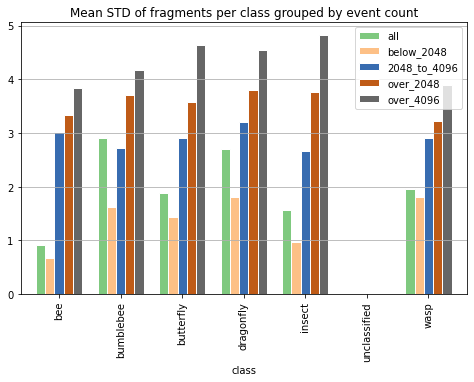

In [23]:
agg = {
    "frag_std":"mean"
}
agg2 = {
    "frag_std":["mean","std"]
}

df_std_per_class = pd.DataFrame()
df_std_per_class[["all","all_std"]] = df.groupby("class").agg(agg2)
df_std_per_class["below_2048"] = df[df["frag_evnt_count"] < 2048].groupby("class").agg(agg)
df_std_per_class["2048_to_4096"] = df[(df["frag_evnt_count"] >= 2048) & (df["frag_evnt_count"] < 4096)].groupby("class").agg(agg)
df_std_per_class[["over_2048","over_2048_std"]] = df[df["frag_evnt_count"] >= 2048].groupby("class").agg(agg2)
df_std_per_class["over_4096"] = df[df["frag_evnt_count"] >= 4096].groupby("class").agg(agg)

ax = df_std_per_class.plot(y=["all", "below_2048", "2048_to_4096", "over_2048", "over_4096"], \
                            kind="bar", colormap="Accent", edgecolor='white', width=0.75, \
                            title="Mean STD of fragments per class grouped by event count")
ax.grid(axis="y")
ax.figure.set_size_inches(8,5)

display(df_std_per_class)

print_columns_for_latex(df_std_per_class, name_first=True, ig)


### Fragment count by minimum fragment STD

,all,STD > 0,STD > 1,STD > 2,STD > 3,STD > 4,STD > 5
class,,,,,,,
bee,3687,1533.0,1199.0,735.0,302.0,88.0,23.0
bumblebee,561,529.0,510.0,398.0,256.0,142.0,49.0
butterfly,1062,817.0,725.0,482.0,190.0,68.0,31.0
dragonfly,2160,1818.0,1719.0,1319.0,736.0,343.0,172.0
insect,527,334.0,291.0,152.0,71.0,40.0,22.0
unclassified,3308,NaN,NaN,NaN,NaN,NaN,NaN
wasp,1028,818.0,758.0,510.0,194.0,69.0,28.0


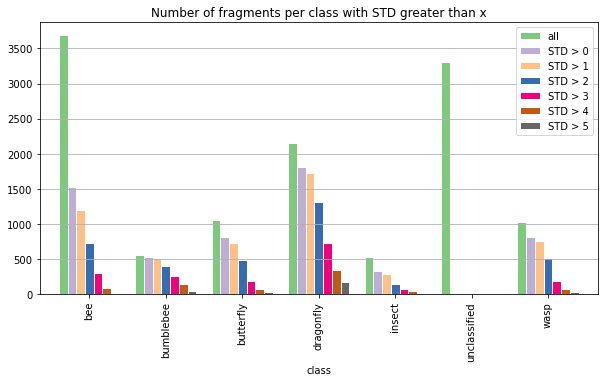

In [ ]:
min_stds = [0,1,2,3,4,5]

df_std_per_class = pd.DataFrame()
df_std_per_class["all"] = df.groupby("class").size()
caps = ["all"]
for std in min_stds:
    cap = f"STD > {std}"
    caps.append(cap)
    df_std_per_class[cap] = df[df["frag_std"] > std].groupby("class").size()

ax = df_std_per_class.plot(y=caps, kind="bar", colormap="Accent", edgecolor='white', width=0.8, \
                            title="Number of fragments per class with STD greater than x")
ax.grid(axis="y")
ax.figure.set_size_inches(10,5)

display(df_std_per_class)



### Fragment count by minimum fragment STD (>= 2048)

,all,STD > 0,STD > 1,STD > 2,STD > 3,STD > 4,STD > 5
class,,,,,,,
bee,319,319.0,318.0,302.0,185.0,69.0,21.0
bumblebee,347,347.0,347.0,330.0,240.0,137.0,47.0
butterfly,218,217.0,214.0,209.0,134.0,41.0,21.0
dragonfly,899,896.0,896.0,871.0,590.0,282.0,139.0
insect,110,108.0,108.0,98.0,57.0,32.0,18.0
unclassified,597,NaN,NaN,NaN,NaN,NaN,NaN
wasp,103,103.0,103.0,94.0,49.0,19.0,10.0


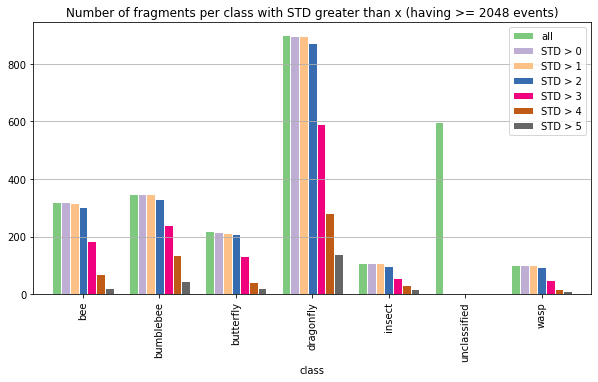

In [ ]:
df_ge2048 = df[df["frag_evnt_count"] >= 2048]

min_stds = [0,1,2,3,4,5]

df_std_per_class = pd.DataFrame()
df_std_per_class["all"] = df_ge2048.groupby("class").size()
caps = ["all"]
for std in min_stds:
    cap = f"STD > {std}"
    caps.append(cap)
    df_std_per_class[cap] = df_ge2048[df_ge2048["frag_std"] > std].groupby("class").size()

ax = df_std_per_class.plot(y=caps, kind="bar", colormap="Accent", edgecolor='white', width=0.8, \
                            title="Number of fragments per class with STD greater than x (having >= 2048 events)")
ax.grid(axis="y")
ax.figure.set_size_inches(10,5)

display(df_std_per_class)



### Number of Fragments per scene

#### >= 0

scene
hn-bee-1      610
hn-but-2     1213
hn-dra-1      216
hn-was-1       70
hn-was-2      327
hn-was-3      227
hn-was-5      404
mb-bum1-1      44
mb-bum1-2      18
mb-bum1-3      13
mb-bum1-4      33
mb-bum1-5      45
mb-bum2-1     202
mb-bum2-2     582
mb-dra1-1     518
mb-dra2-1    1428
mu-1         1112
mu-2          590
mu-3         3075
mu-4          518
mu-5           61
mu-6         1027
dtype: int64

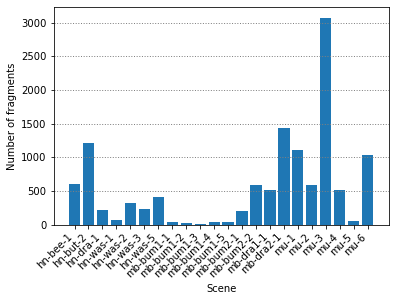

In [ ]:
# number of fragments per scene
df1 = df.groupby("scene").size()
display(df1)

plt.bar(df1.index, df1)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Scene")
plt.ylabel("Number of fragments")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.show()


#### >= 2048

scene
hn-bee-1      15
hn-but-2     286
hn-dra-1      98
hn-was-1       2
hn-was-2       9
hn-was-3      12
hn-was-5      80
mb-bum1-1     44
mb-bum1-2     17
mb-bum1-3     13
mb-bum1-4     32
mb-bum1-5     39
mb-bum2-1    142
mb-bum2-2    135
mb-dra1-1    266
mb-dra2-1    537
mu-1         430
mu-2         110
mu-3         269
mu-4          25
mu-6          32
dtype: int64

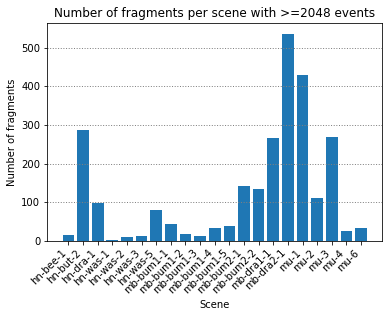

In [ ]:
# number of fragments per scene WHERE >= 2048
df1 = df[df["frag_evnt_count"] >= 4096//2 ].groupby("scene").size()
display(df1)

plt.bar(df1.index, df1)
plt.title("Number of fragments per scene with >=2048 events")
plt.xlabel("Scene")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Number of fragments")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.show()

#### >= 4096

scene
hn-bee-1       3
hn-but-2     121
hn-dra-1      46
hn-was-2       3
hn-was-3       3
hn-was-5      27
mb-bum1-1     43
mb-bum1-2     16
mb-bum1-3     12
mb-bum1-4     30
mb-bum1-5     32
mb-bum2-1     86
mb-bum2-2     39
mb-dra1-1    133
mb-dra2-1    229
mu-1         373
mu-2          75
mu-3         118
mu-4           4
mu-6          22
dtype: int64

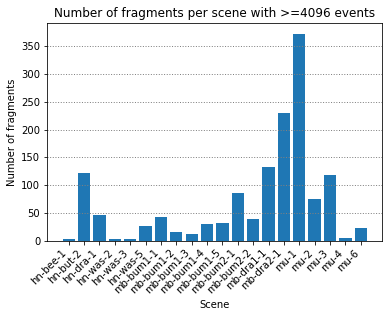

In [ ]:
# number of fragments per scene WHERE >= 4096
df1 = df[df["frag_evnt_count"] >= 4096 ].groupby("scene").size()
display(df1)

plt.bar(df1.index, df1)
plt.title("Number of fragments per scene with >=4096 events")
plt.xlabel("Scene")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Number of fragments")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.show()

### Number of Fragments per Instance

In [ ]:
df1 = df[df["frag_evnt_count"] >= 2048 ].groupby(["scene","instance_id"]).size().sort_values()

print(df1.mean())
print(df1.median())

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df1)

8.077881619937695
4.0


scene      instance_id
hn-bee-1   0                1
mu-1       29               1
hn-but-2   36               1
mu-1       28               1
           27               1
           26               1
mb-bum2-2  45               1
mu-1       21               1
mb-bum2-2  47               1
mu-1       4                1
mb-bum1-5  6                1
mb-dra2-1  36               1
           32               1
           26               1
mb-dra1-1  17               1
mb-dra2-1  16               1
           15               1
mb-dra1-1  49               1
           50               1
hn-was-5   1                1
           5                1
           8                1
mb-dra2-1  13               1
hn-was-5   14               1
           20               1
mb-dra1-1  70               1
hn-was-5   42               1
           46               1
           58               1
           55               1
hn-but-2   30               1
mu-2       15               1
hn-dra-1   9     